In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)


In [2]:
#lets have a look at the data file
import csv
with open('./groceriesAR.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row_number, row in enumerate(reader):
        print("[{}] {}".format(row_number,', '.join(row)))        
        if (row_number>10):
            break

[0] citrus fruit, semi-finished bread, margarine, ready soups
[1] tropical fruit, yogurt, coffee
[2] whole milk
[3] pip fruit, yogurt, cream cheese, meat spreads
[4] other vegetables, whole milk, condensed milk, long life bakery product
[5] whole milk, butter, yogurt, rice, abrasive cleaner
[6] rolls/buns
[7] other vegetables, UHT-milk, rolls/buns, bottled beer, liquor (appetizer)
[8] potted plants
[9] whole milk, cereals
[10] tropical fruit, other vegetables, white bread, bottled water, chocolate
[11] citrus fruit, tropical fruit, whole milk, butter, curd, yogurt, flour, bottled water, dishes


In [3]:
#load dataset
df = pd.read_table('./groceriesAR.csv',header=None)
#create binary matrix to be used as input to apriori
df1= df.iloc[:,0].str.get_dummies(sep=',')
df1.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,potato products,potted plants,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
#count number of transactions in dataset 
len(df1.index)

9835

In [5]:
#how many transactions contain beef
df1['beef'].sum()

516

In [6]:
#count number of transactions per product
df1.sum().nlargest(10)

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
dtype: int64

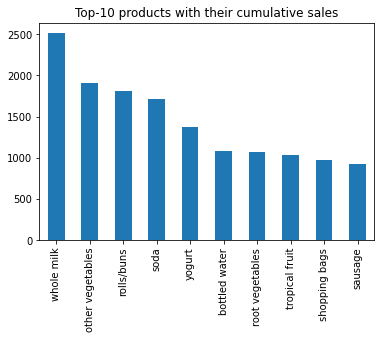

In [7]:
#plot products with most transactions
df1.sum().nlargest(10).plot.bar(title='Top-10 products with their cumulative sales')

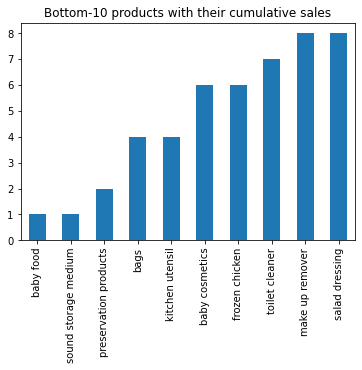

In [8]:
#plot products with most transactions
df1.sum().nsmallest(10).plot.bar(title='Bottom-10 products with their cumulative sales')

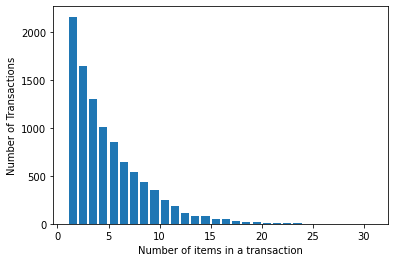

In [9]:
#row sum computes number of products in a basket
dfcounts=df1.sum(axis=1)
plt.xlabel('Number of items in a transaction')
plt.ylabel('Number of Transactions')
plt.hist(dfcounts,bins=range(1,32),rwidth=0.8)
plt.show()

In [10]:
# Build up the frequent items
frequent_itemsets = apriori(df1, min_support=0.002, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.003559,(abrasive cleaner)
3,0.003254,(artif. sweetener)
4,0.017692,(baking powder)
...,...,...
4218,0.002542,"(other vegetables, whole milk, tropical fruit,..."
4219,0.003559,"(other vegetables, root vegetables, whole milk..."
4220,0.002339,"(other vegetables, root vegetables, whole milk..."
4221,0.002440,"(other vegetables, whole milk, tropical fruit,..."


In [11]:
#plot itemsets with exactly 3 items with highest support values
frequent_itemsets[frequent_itemsets.itemsets.str.len()==3].sort_values(by=['support'],ascending=False).head()


,support,itemsets
3486,0.023183,"(root vegetables, other vegetables, whole milk)"
3546,0.022267,"(whole milk, other vegetables, yogurt)"
3473,0.017895,"(rolls/buns, other vegetables, whole milk)"
3535,0.017082,"(tropical fruit, other vegetables, whole milk)"
3698,0.015557,"(rolls/buns, whole milk, yogurt)"


In [12]:
# Create the rules
rules = association_rules(frequent_itemsets)
rules[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,"(curd, hamburger meat)",(whole milk),0.002542,0.806452,3.156169
1,"(rolls/buns, herbs)",(whole milk),0.002440,0.800000,3.130919
2,"(tropical fruit, herbs)",(whole milk),0.002339,0.821429,3.214783
3,"(butter, other vegetables, pork)",(whole milk),0.002237,0.846154,3.311549
4,"(domestic eggs, other vegetables, curd)",(whole milk),0.002847,0.823529,3.223005
5,"(tropical fruit, whole milk, grapes)",(other vegetables),0.002034,0.800000,4.134524
6,"(root vegetables, tropical fruit, whole milk, ...",(other vegetables),0.003152,0.885714,4.577509
7,"(root vegetables, other vegetables, yogurt, ci...",(whole milk),0.002339,0.821429,3.214783
8,"(fruit/vegetable juice, other vegetables, yogu...",(whole milk),0.002034,0.833333,3.261374
9,"(fruit/vegetable juice, yogurt, whole milk, ro...",(other vegetables),0.002034,0.800000,4.134524


In [13]:
#list rules with high lift and confidence values
rules[ (rules['lift'] >= 4) &
       (rules['confidence'] >= 0.8) ] [['antecedents','consequents','support','confidence','lift']]



,antecedents,consequents,support,confidence,lift
5,"(tropical fruit, whole milk, grapes)",(other vegetables),0.002034,0.800000,4.134524
6,"(root vegetables, tropical fruit, whole milk, ...",(other vegetables),0.003152,0.885714,4.577509
9,"(fruit/vegetable juice, yogurt, whole milk, ro...",(other vegetables),0.002034,0.800000,4.134524


In [14]:
def draw(rules):
    import networkx as nx  
    G = nx.DiGraph()

    for i,row in rules.iterrows():      
        for c in row['consequents']:
            G.add_nodes_from([c])
            for a in row['antecedents']: 
                G.add_nodes_from([a])
                G.add_edge(a,c,color='black',weight=row['confidence'])
    color_map=[]
    for node in G:
        #color blue nodes that participate as a consequent to a rule
        if (rules['consequents'].str.contains(node, regex=False).any()):
            color_map.append('blue') 
        else:
            color_map.append('red')  

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    
    min_weight=min(weights)-0.01
    max_weight=max(weights)
    weights = [5*(w-min_weight)/(max_weight-min_weight) for w in weights]
    
    pos = nx.spring_layout(G, k=10, scale=1)
    nx.draw(G, pos,edges=edges,edge_color=colors,node_color=color_map,width=weights,font_size=8,with_labels=False)            
    for p in pos:  # raise text positions
      pos[p][1] += 0.18
    nx.draw_networkx_labels(G, pos)
 
    plt.show()

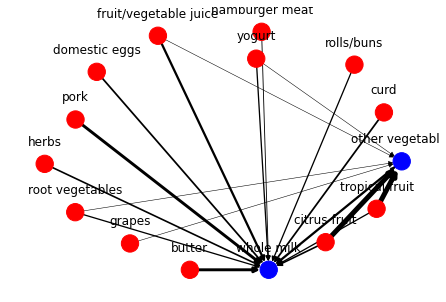

In [15]:
draw(rules)  


In [16]:
#list rules that contain 'citrus fruit' in the LHS
rules[rules['antecedents'].apply(str).str.contains('citrus fruit')][['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
6,"(root vegetables, tropical fruit, whole milk, ...",(other vegetables),0.003152,0.885714,4.577509
7,"(root vegetables, other vegetables, yogurt, ci...",(whole milk),0.002339,0.821429,3.214783


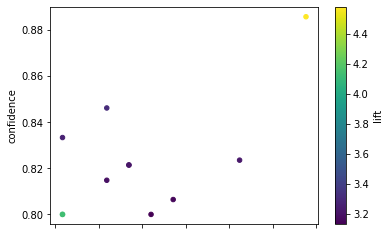

In [17]:
rules.plot.scatter(x='support',y='confidence',c='lift', colormap='viridis')

In [18]:
rules[ (rules['lift'] >= 4.4)][['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
6,"(root vegetables, tropical fruit, whole milk, ...",(other vegetables),0.003152,0.885714,4.577509
